# Preliminary Data Exploration of Zillow Dataset
Purpose
This notebook performs some preliminary data exploration of the Zillow academic dataset in preparation for use of the data in the final group project.

* Delete unneeded columns
* Find and drop null values
* find number of zipcodes per state
* averaging housing prices for Years 2016, 2017, 2018, 2019 and 2021
* Change "RegionName" to "postal_code" to match Yelp dataset
* Export cleaned dataframe as csv

Data Source
Data & Documentation: https://www.zillow.com/research/data/

<em>Only the data based on zipcodes: csv file was explored in this notebook</em>

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
#load file
filepath = "../Resources/zillow_zip.csv"
housing_df = pd.read_csv(filepath)

In [169]:
housing_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,323652.0,...,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0,1139877.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,306875.0,...,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0,521646.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,494584.0,...,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0,1485519.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,224011.0,...,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0,446576.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,399459.0,...,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0,665572.0


In [170]:
#print column names
housing_df.columns.to_list()

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-31',
 '2001-08-31',
 '2001-09-30',
 '2001-10-31',
 '2001-11-30',
 '2001-12-31',
 '2002-01-31',
 '2002-02-28',
 '2002-03-31',
 '2002-04-30',
 '2002-05-31',
 '2002-06-30',
 '2002-07-31',
 '2002-08-31',
 '2002-09-30',
 '2002-10-31',
 '2002-11-30',
 '2002-12-31',
 '2003-01-31',
 '2003-02-28',
 '2003-03-31',
 '2003-04-30',
 '2003-05-31',
 '2003-06-30',
 '2003-07-31',
 '2003-08-31',
 '2003-09-30',
 '2003-10-31',
 '2003-11-30',
 '2003-12-31',
 '2004-01-31',
 '2004-02-29',
 '2004-03-31',
 '2004-04-30',
 '2004-05-31',
 '2004-06-30',
 '2004-07-31',
 '2004-08-31',
 '2004-09-30',
 '2004-10-31',
 '2004-11-30',
 

# Dropping unneeded/unnecessary columns
* columns 9 through 201 (2000-01-31 to 2015-12-31) as we are only using data from 2016
* dropping columns "RegionID", "SizeRank", "RegionType", "StateName" and "Metro"

In [171]:
#we are using only data from 2016, so we drop the columns of housing prices from 2000-2015
drop_col = housing_df.columns[9:201]
drop_col

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
       '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
      dtype='object', length=192)

In [172]:
housing_df = housing_df.drop(drop_col,  axis =1)


In [173]:
#dropping columns "RegionID", "SizeRank", "RegionType","StateName"
housing_df = housing_df.drop(columns = ["RegionID", "SizeRank", "RegionType","StateName", "Metro"], axis=1)

In [174]:
housing_df.shape

(30468, 77)

In [175]:
housing_df.head()

,RegionName,State,City,CountyName,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,10025,NY,New York,New York County,1007253.0,1014601.0,1019418.0,1021871.0,1021072.0,1022123.0,...,1090831.0,1097696.0,1101821.0,1110506.0,1119342.0,1129669.0,1134048.0,1133431.0,1133999.0,1139877.0
1,60657,IL,Chicago,Cook County,451789.0,458732.0,463061.0,465375.0,464535.0,463814.0,...,499075.0,499598.0,502373.0,506116.0,510520.0,513056.0,515590.0,518330.0,520287.0,521646.0
2,10023,NY,New York,New York County,1356052.0,1359205.0,1363328.0,1371235.0,1377786.0,1380711.0,...,1437688.0,1432518.0,1430890.0,1432703.0,1446795.0,1462236.0,1470688.0,1474849.0,1475156.0,1485519.0
3,77494,TX,Katy,Harris County,340359.0,338918.0,337549.0,337155.0,337427.0,336027.0,...,373396.0,380344.0,389081.0,399801.0,410661.0,419763.0,427705.0,434772.0,440495.0,446576.0
4,60614,IL,Chicago,Cook County,592368.0,600754.0,606018.0,608599.0,606610.0,605117.0,...,638052.0,638200.0,640707.0,644396.0,649329.0,652449.0,656282.0,660835.0,663698.0,665572.0


In [176]:
housing_df.describe()

,RegionName,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
count,30468.000000,2.861100e+04,2.864600e+04,2.867600e+04,2.868400e+04,2.869600e+04,2.873000e+04,2.874000e+04,2.879300e+04,2.880500e+04,...,3.039400e+04,3.035800e+04,3.042000e+04,3.041000e+04,3.040300e+04,3.042800e+04,3.044100e+04,3.044600e+04,3.030400e+04,3.044600e+04
mean,48841.839208,1.993819e+05,2.000943e+05,2.006757e+05,2.014476e+05,2.021519e+05,2.027451e+05,2.031534e+05,2.034507e+05,2.039584e+05,...,2.580836e+05,2.619085e+05,2.664968e+05,2.713916e+05,2.757969e+05,2.794254e+05,2.823425e+05,2.850742e+05,2.892059e+05,2.927119e+05
std,27404.005828,2.151298e+05,2.160750e+05,2.164761e+05,2.171849e+05,2.175732e+05,2.179739e+05,2.167966e+05,2.161664e+05,2.158162e+05,...,2.574985e+05,2.622051e+05,2.680379e+05,2.745800e+05,2.797231e+05,2.833444e+05,2.857783e+05,2.884209e+05,2.919223e+05,2.950256e+05
min,501.000000,1.276900e+04,1.279900e+04,1.257100e+04,1.208700e+04,1.196100e+04,1.224900e+04,1.243900e+04,1.187800e+04,1.192300e+04,...,1.440500e+04,1.429700e+04,1.434500e+04,1.444900e+04,1.457000e+04,1.474600e+04,1.487800e+04,1.495100e+04,1.533000e+04,1.570700e+04
25%,25970.500000,9.427550e+04,9.455125e+04,9.490350e+04,9.515675e+04,9.552925e+04,9.577900e+04,9.611975e+04,9.628600e+04,9.651400e+04,...,1.200988e+05,1.211815e+05,1.226682e+05,1.241170e+05,1.255580e+05,1.270408e+05,1.281130e+05,1.290225e+05,1.309000e+05,1.330292e+05
50%,48413.500000,1.425340e+05,1.429495e+05,1.434315e+05,1.439765e+05,1.445620e+05,1.449910e+05,1.456780e+05,1.460290e+05,1.464690e+05,...,1.889155e+05,1.911555e+05,1.938355e+05,1.965230e+05,1.992570e+05,2.016020e+05,2.038140e+05,2.056995e+05,2.089830e+05,2.116330e+05
75%,71732.500000,2.257010e+05,2.265948e+05,2.275702e+05,2.285358e+05,2.293898e+05,2.303702e+05,2.312648e+05,2.318000e+05,2.325630e+05,...,3.050215e+05,3.101438e+05,3.159640e+05,3.221150e+05,3.280755e+05,3.325788e+05,3.367260e+05,3.408808e+05,3.460762e+05,3.504628e+05
max,99901.000000,6.259305e+06,6.300343e+06,6.275572e+06,6.276700e+06,6.241792e+06,6.262980e+06,6.058728e+06,5.933207e+06,5.846646e+06,...,6.675217e+06,6.797763e+06,6.990922e+06,7.142055e+06,7.280961e+06,7.398273e+06,7.479900e+06,7.542035e+06,7.589458e+06,7.684370e+06


# Drop rows with null values

In [177]:
#check for null values
for column in housing_df.columns:
    print(f"column {column} has {housing_df[column].isnull().sum()} null values")

column RegionName has 0 null values
column State has 0 null values
column City has 0 null values
column CountyName has 0 null values
column 2016-01-31 has 1857 null values
column 2016-02-29 has 1822 null values
column 2016-03-31 has 1792 null values
column 2016-04-30 has 1784 null values
column 2016-05-31 has 1772 null values
column 2016-06-30 has 1738 null values
column 2016-07-31 has 1728 null values
column 2016-08-31 has 1675 null values
column 2016-09-30 has 1663 null values
column 2016-10-31 has 1652 null values
column 2016-11-30 has 1641 null values
column 2016-12-31 has 1631 null values
column 2017-01-31 has 1526 null values
column 2017-02-28 has 1500 null values
column 2017-03-31 has 1490 null values
column 2017-04-30 has 1468 null values
column 2017-05-31 has 1462 null values
column 2017-06-30 has 1436 null values
column 2017-07-31 has 1405 null values
column 2017-08-31 has 1385 null values
column 2017-09-30 has 1361 null values
column 2017-10-31 has 1334 null values
column 20

In [178]:
#dropping all rows with null values
housing_df = housing_df.dropna()

In [179]:
housing_df.shape

(27696, 77)

In [180]:
#check for duplicate zipcodes
housing_df["RegionName"].duplicated(keep='first').sum()

0

# Number of zipcodes per state

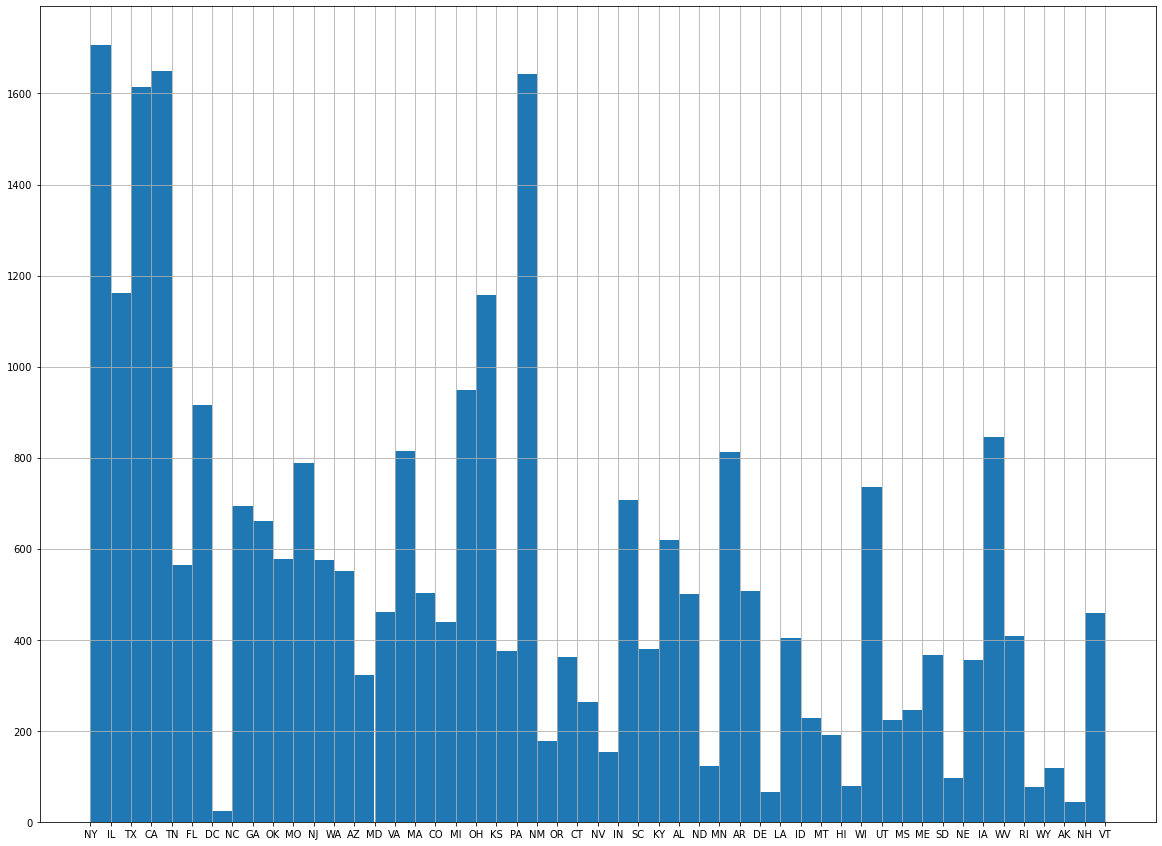

In [181]:
# number of zipcodes per state shown below 
housing_df["State"].hist(bins =50, figsize=(20,15))
plt.show()

In [182]:
housing_df["State"].unique()

array(['NY', 'IL', 'TX', 'CA', 'TN', 'FL', 'DC', 'NC', 'GA', 'OK', 'MO',
       'NJ', 'WA', 'AZ', 'MD', 'VA', 'MA', 'CO', 'MI', 'OH', 'KS', 'PA',
       'NM', 'OR', 'CT', 'NV', 'IN', 'SC', 'KY', 'AL', 'ND', 'MN', 'AR',
       'DE', 'LA', 'ID', 'MT', 'HI', 'WI', 'UT', 'MS', 'ME', 'SD', 'NE',
       'IA', 'WV', 'RI', 'WY', 'AK', 'NH', 'VT'], dtype=object)

In [183]:
housing_df["State"].value_counts()


NY    1706
CA    1650
PA    1642
TX    1615
IL    1162
OH    1157
MI     949
FL     916
IA     845
VA     814
MN     812
MO     789
WI     736
IN     706
NC     694
GA     661
KY     620
OK     578
NJ     575
TN     565
WA     551
AR     508
MA     502
AL     500
MD     461
CO     440
WV     408
LA     403
SC     380
KS     375
ME     367
OR     362
NE     356
AZ     323
CT     264
VT     248
MS     246
ID     228
UT     224
NH     210
MT     191
NM     178
NV     153
ND     122
WY     119
SD      97
HI      79
RI      76
DE      66
AK      44
DC      23
Name: State, dtype: int64

# Averaging Housing Prices 
* averaging housing prices for Years 2016, 2017, 2018, 2019 and 2021
* rounding to nearest integer
* adding the averaged values as columns 2016, 2017, 2018, 2019, 2020, 2021, 2022
* dropping columns 5 through 78 that contained the monthly housing prices. 

In [184]:
i = range(5,housing_df.shape[1],12)
for iter in i:
    j = iter+12
    avg_col = housing_df.iloc[:, iter:j]
    col_name = housing_df.columns[iter]
    col_name = col_name.split('-')[0]
    housing_df[col_name] = avg_col.mean(axis=1).astype(int)


In [185]:
housing_df.head()

,RegionName,State,City,CountyName,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,...,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2016,2017,2018,2019,2020,2021
0,10025,NY,New York,New York County,1007253.0,1014601.0,1019418.0,1021871.0,1021072.0,1022123.0,...,1134048.0,1133431.0,1133999.0,1139877.0,1023969,1019755,1046267,1068521,1035675,1114145
1,60657,IL,Chicago,Cook County,451789.0,458732.0,463061.0,465375.0,464535.0,463814.0,...,515590.0,518330.0,520287.0,521646.0,466042,478119,484504,478017,483617,508407
2,10023,NY,New York,New York County,1356052.0,1359205.0,1363328.0,1371235.0,1377786.0,1380711.0,...,1470688.0,1474849.0,1475156.0,1485519.0,1376431,1409487,1488460,1400072,1453596,1450186
3,77494,TX,Katy,Harris County,340359.0,338918.0,337549.0,337155.0,337427.0,336027.0,...,427705.0,434772.0,440495.0,446576.0,334947,332746,336492,337284,343088,404243
4,60614,IL,Chicago,Cook County,592368.0,600754.0,606018.0,608599.0,606610.0,605117.0,...,656282.0,660835.0,663698.0,665572.0,607017,621614,628324,620016,620261,648360


In [186]:
col_drop = housing_df.columns[5:78]
print(col_drop)
housing_df = housing_df.drop(col_drop,  axis =1)


Index(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
       '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
       '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
       '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
       '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
       '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',

In [187]:
housing_df.head()

,RegionName,State,City,CountyName,2016-01-31,2017,2018,2019,2020,2021
0,10025,NY,New York,New York County,1007253.0,1019755,1046267,1068521,1035675,1114145
1,60657,IL,Chicago,Cook County,451789.0,478119,484504,478017,483617,508407
2,10023,NY,New York,New York County,1356052.0,1409487,1488460,1400072,1453596,1450186
3,77494,TX,Katy,Harris County,340359.0,332746,336492,337284,343088,404243
4,60614,IL,Chicago,Cook County,592368.0,621614,628324,620016,620261,648360


In [188]:
housing_df.shape

(27696, 10)

# Change "RegionName" to "postal_code"

In [189]:
housing_df.rename(columns = {"RegionName":"postal_code"}, inplace=True)

In [190]:
housing_df.head()

,postal_code,State,City,CountyName,2016-01-31,2017,2018,2019,2020,2021
0,10025,NY,New York,New York County,1007253.0,1019755,1046267,1068521,1035675,1114145
1,60657,IL,Chicago,Cook County,451789.0,478119,484504,478017,483617,508407
2,10023,NY,New York,New York County,1356052.0,1409487,1488460,1400072,1453596,1450186
3,77494,TX,Katy,Harris County,340359.0,332746,336492,337284,343088,404243
4,60614,IL,Chicago,Cook County,592368.0,621614,628324,620016,620261,648360


In [191]:
housing_df.shape

(27696, 10)

# Export data as csv

In [192]:
# Export housing_df to csv
file = "../Resources/zillow_housing_prelim_clean.csv"
housing_df.to_csv(file)